Bi-Polar Step function converged in 999 epochs.
Sigmoid function converged in 999 epochs.
ReLU function converged in 389 epochs.


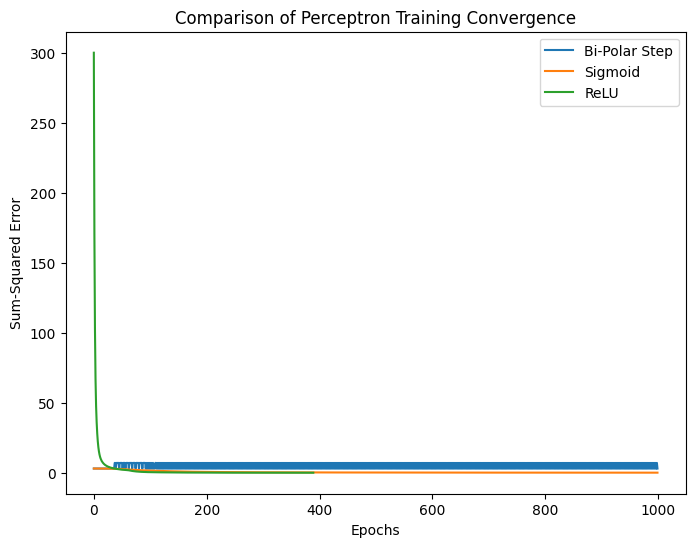

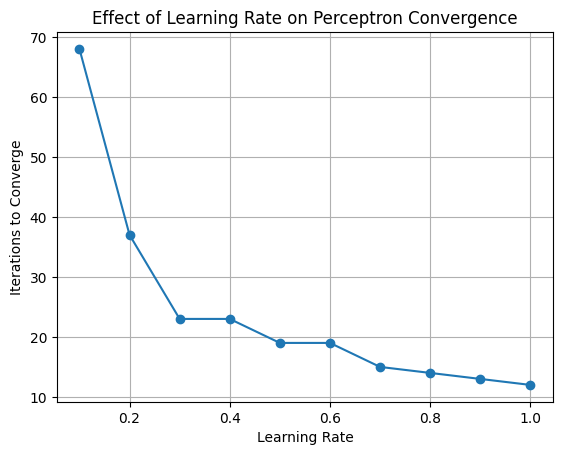

Epoch 0, Error: 0.49941109351361046
Epoch 1000, Error: 0.22803979949799513
Epoch 2000, Error: 0.05786640318155928
Epoch 3000, Error: 0.03941934170113361
Epoch 4000, Error: 0.031522350592532125
Epoch 5000, Error: 0.026929969780262443
Epoch 6000, Error: 0.023851946378852643
Epoch 7000, Error: 0.021610980325799597
Epoch 8000, Error: 0.019888356333073138
Epoch 9000, Error: 0.01851228605499001

Trained Weights and Biases:
Hidden Layer Weights:
 [[4.59768352 6.44107541]
 [4.60129658 6.45560259]]
Hidden Layer Bias:
 [[-7.05875576 -2.86481644]]
Output Layer Weights:
 [[-10.28142379]
 [  9.59368371]]
Output Layer Bias:
 [[-4.44169483]]
Input: [0 0], Predicted XOR Output: [[0.]]
Input: [0 1], Predicted XOR Output: [[1.]]
Input: [1 0], Predicted XOR Output: [[1.]]
Input: [1 1], Predicted XOR Output: [[0.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (1a) Summation Unit
def summation_unit(inputs, weights, bias):
    """ Computes weighted sum of inputs including bias """
    return np.dot(inputs, weights) + bias

# (1b) Activation Functions
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# (2,3) Perceptron Training with Different Activation Functions
def train_perceptron(X, Y, activation_func, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    weights = np.array([0.2, -0.75])  # W1, W2
    bias = 10  # Bias initialized separately
    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            summation_result = summation_unit(X[i], weights, bias)
            y_pred = activation_func(summation_result)
            error = Y[i] - y_pred

            # Update weights and bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

            total_error += error ** 2

        epoch_errors.append(total_error)

        if total_error <= error_threshold:
            break

    return weights, bias, epoch_errors, epoch  # Return final values

# AND Gate Dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_and = np.array([0, 0, 0, 1])

# Train perceptron with different activation functions
results = {}
for activation_name, activation_func in [("Bi-Polar Step", bipolar_step_function),
                                         ("Sigmoid", sigmoid),
                                         ("ReLU", relu)]:
    final_weights, final_bias, error_history, epochs_taken = train_perceptron(X_and, Y_and, activation_func)
    results[activation_name] = (epochs_taken, error_history)

    print(f"{activation_name} function converged in {epochs_taken} epochs.")

# Plot comparison of training convergence
plt.figure(figsize=(8, 6))
for activation_name, (_, error_history) in results.items():
    plt.plot(range(len(error_history)), error_history, label=activation_name)

plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Comparison of Perceptron Training Convergence")
plt.legend()
plt.show()

#4
import numpy as np
import matplotlib.pyplot as plt

# AND gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # Expected outputs

# Initial weights
w = np.array([10, 0.2, -0.75])  # Bias included as w0
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_needed = []

def step_function(value):
    return 1 if value >= 0 else 0

for alpha in learning_rates:
    weights = w.copy()
    num_iterations = 0
    converged = False

    while num_iterations < 1000:
        total_error = 0
        for i in range(len(X)):
            inputs = np.insert(X[i], 0, 1)  # Add bias term
            summation = np.dot(weights, inputs)
            prediction = step_function(summation)
            error = y[i] - prediction
            weights += alpha * error * inputs  # Weight update rule
            total_error += abs(error)

        num_iterations += 1
        if total_error <= 0.002:
            converged = True
            break

    iterations_needed.append(num_iterations if converged else 1000)

# Plot results
plt.plot(learning_rates, iterations_needed, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Effect of Learning Rate on Perceptron Convergence')
plt.grid(True)
plt.show()

#5
import numpy as np

# Sigmoid activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR Training Data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])  # XOR output

# Initialize weights and biases
np.random.seed(42)
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Random weights and biases
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training parameters
learning_rate = 0.5
epochs = 10000

# Training using Backpropagation
for epoch in range(epochs):
    # Forward Pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Error Calculation
    error = Y - final_output

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

# Final Results
print("\nTrained Weights and Biases:")
print("Hidden Layer Weights:\n", weights_input_hidden)
print("Hidden Layer Bias:\n", bias_hidden)
print("Output Layer Weights:\n", weights_hidden_output)
print("Output Layer Bias:\n", bias_output)

# Testing XOR
for i in range(len(X)):
    hidden_layer_input = np.dot(X[i], weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    print(f"Input: {X[i]}, Predicted XOR Output: {final_output.round()}")


In [ ]:
#6
import numpy as np

# Data: [Candies, Mangoes, Milk Packets, Payment]
X = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

# Labels: 1 for High Value, 0 for Low Value
Y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Normalize features
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# 1. Perceptron Training
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_perceptron(X, Y, learning_rate=0.1, epochs=1000, threshold=0.002):
    np.random.seed(42)
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        error = Y - y_pred
        loss = np.mean(error ** 2)

        # Gradient update
        weights += learning_rate * np.dot(X.T, error * y_pred * (1 - y_pred))
        bias += learning_rate * np.sum(error * y_pred * (1 - y_pred))

        if loss <= threshold:
            print(f"Perceptron Converged at epoch {epoch}")
            break

    return weights, bias

# Train Perceptron
perceptron_weights, perceptron_bias = train_perceptron(X, Y)

# 2. Pseudo-Inverse Method
X_pinv = np.linalg.pinv(X)  # Compute pseudo-inverse
pseudo_inverse_weights = np.dot(X_pinv, Y)  # Compute weights

# 3. Compare Predictions
def predict(X, weights, bias=0):
    return (sigmoid(np.dot(X, weights) + bias) > 0.5).astype(int)

perceptron_preds = predict(X, perceptron_weights, perceptron_bias)
pseudo_inverse_preds = predict(X, pseudo_inverse_weights)

# Compute Accuracy
perceptron_acc = np.mean(perceptron_preds == Y) * 100
pseudo_inverse_acc = np.mean(pseudo_inverse_preds == Y) * 100

# Display Results
print("Perceptron Weights:", perceptron_weights)
print("Pseudo-Inverse Weights:", pseudo_inverse_weights)
print(f"Perceptron Accuracy: {perceptron_acc:.2f}%")
print(f"Pseudo-Inverse Accuracy: {pseudo_inverse_acc:.2f}%")

#8
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])  # AND gate outputs

# Initialize weights and biases randomly
np.random.seed(42)
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

W1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
b1 = np.random.uniform(-1, 1, (1, hidden_neurons))
W2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))
b2 = np.random.uniform(-1, 1, (1, output_neurons))

# Learning rate
alpha = 0.05

# Training loop
max_epochs = 1000
convergence_threshold = 0.002

for epoch in range(max_epochs):
    # Forward pass
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # Calculate error
    error = Y - final_output
    loss = np.mean(error**2)  # Mean Squared Error

    # Check convergence
    if loss <= convergence_threshold:
        print(f"Converged at epoch {epoch} with error {loss:.6f}")
        break

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * alpha
    b2 += np.sum(d_output, axis=0, keepdims=True) * alpha
    W1 += X.T.dot(d_hidden) * alpha
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * alpha

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# Final output after training
print("Final output after training:")
print(final_output)


Perceptron Weights: [-0.49045461  5.00147493 -0.45354958  4.24004906]
Pseudo-Inverse Weights: [ 0.01244976  8.03128292  1.91051336 -6.92337828]
Perceptron Accuracy: 100.00%
Pseudo-Inverse Accuracy: 60.00%
Epoch 0, Loss: 0.272155
Epoch 100, Loss: 0.186787
Epoch 200, Loss: 0.178158
Epoch 300, Loss: 0.171875
Epoch 400, Loss: 0.165364
Epoch 500, Loss: 0.158397
Epoch 600, Loss: 0.150971
Epoch 700, Loss: 0.143142
Epoch 800, Loss: 0.134974
Epoch 900, Loss: 0.126528
Final output after training:
[[0.1448507 ]
 [0.24945741]
 [0.33373673]
 [0.47349264]]


Did not converge


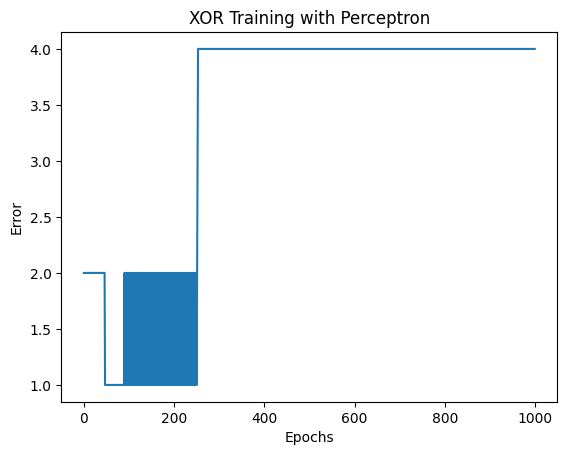

In [ ]:
#A9
import numpy as np
import matplotlib.pyplot as plt

# XOR Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias (W0=10, W1=0.2, W2=-0.75)
weights = np.array([0.2, -0.75])
bias = 10
learning_rate = 0.05
max_epochs = 1000
error_threshold = 0.002

def step_activation(x):
    return 1 if x >= 0 else 0

error_history = []
converged = False

for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X_xor)):
        inputs = X_xor[i]
        target = Y_xor[i]
        summation = np.dot(inputs, weights) + bias
        prediction = step_activation(summation)
        error = target - prediction
        weights += learning_rate * error * inputs
        bias += learning_rate * error
        total_error += error ** 2
    error_history.append(total_error)
    if total_error <= error_threshold:
        converged = True
        break

print("Converged" if converged else "Did not converge")
plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('XOR Training with Perceptron')
plt.show()

Converged in 129 epochs


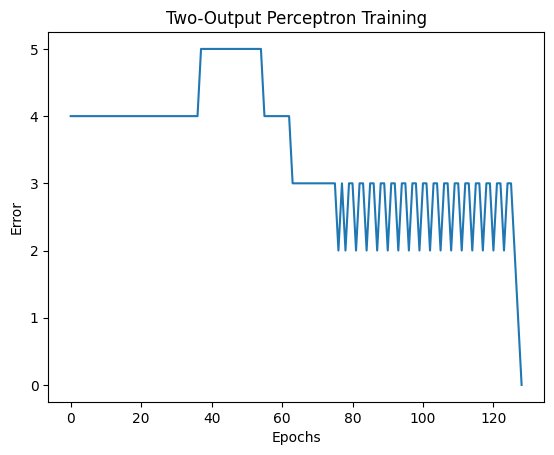

In [ ]:
#A10
import numpy as np
import matplotlib.pyplot as plt

# AND Gate with one-hot encoded outputs
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # [O1, O2]

# Initialize weights and biases with FLOAT data type
weights = np.array([[0.2, -0.75], [0.3, -0.8]], dtype=np.float64)  # Two output nodes
bias = np.array([10.0, 10.0], dtype=np.float64)  # Explicitly use float
learning_rate = 0.05

def step(x):
    return 1 if x >= 0 else 0

error_history = []
for epoch in range(1000):
    total_error = 0
    for i in range(len(X_and)):
        inputs = X_and[i]
        summations = np.dot(weights, inputs) + bias
        predictions = np.array([step(s) for s in summations])
        errors = Y_and[i] - predictions
        weights += np.outer(errors, inputs) * learning_rate
        bias += errors * learning_rate  # Now valid (float + float)
        total_error += sum(errors ** 2)
    error_history.append(total_error)
    if total_error <= 0.002:
        break

print(f"Converged in {epoch+1} epochs")
plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Two-Output Perceptron Training')
plt.show()

In [ ]:
#A11
from sklearn.neural_network import MLPClassifier

# AND Gate
X_and = [[0,0], [0,1], [1,0], [1,1]]
Y_and = [0, 0, 0, 1]
mlp_and = MLPClassifier(hidden_layer_sizes=(), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlp_and.fit(X_and, Y_and)
print("AND Predictions:", mlp_and.predict(X_and))

# XOR Gate (requires hidden layer)
X_xor = [[0,0], [0,1], [1,0], [1,1]]
Y_xor = [0, 1, 1, 0]
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000)
mlp_xor.fit(X_xor, Y_xor)
print("XOR Predictions:", mlp_xor.predict(X_xor))

AND Predictions: [0 0 0 1]
XOR Predictions: [0 0 0 0]


In [ ]:
#A12
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load customer data
data = {
    'Candles': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)
X = df.drop('High Value Tx', axis=1)
y = df['High Value Tx']

# Scale data and train MLP
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=1000)
mlp.fit(X_scaled, y)
print("Accuracy:", mlp.score(X_scaled, y))

Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
